In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


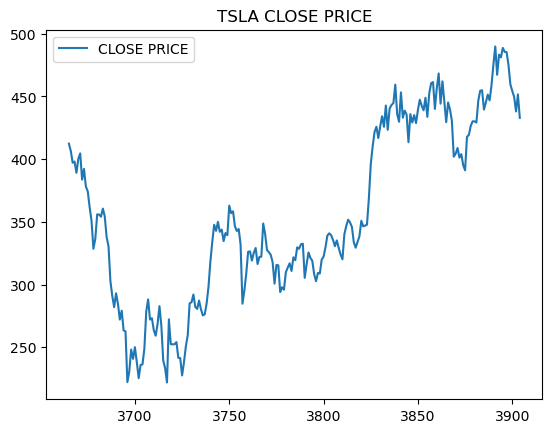

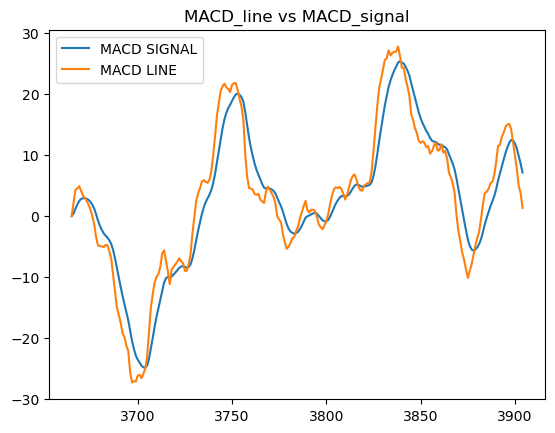

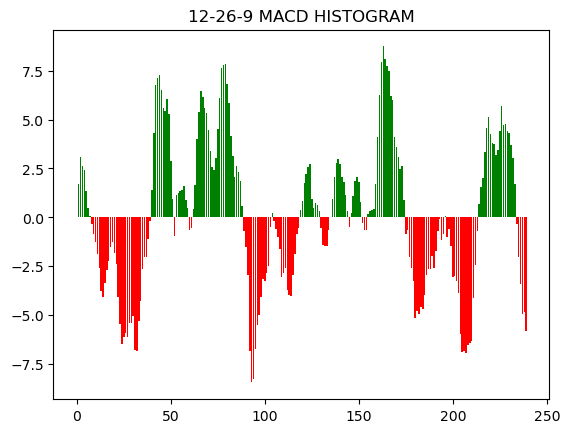

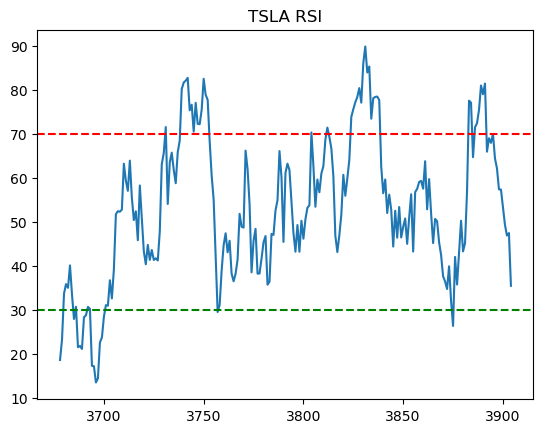

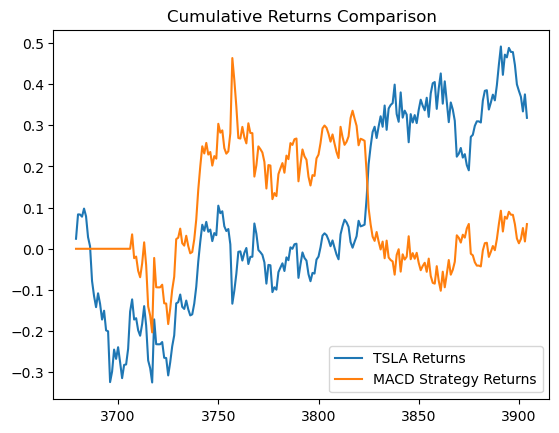

Price,Date,Close,High,Low,Open,Volume,12_ema,26_ema,MACD,MACD_signal,MACD_hist,RSI,RSI_strategy,RSI_signal,MACD_strategy,full_strategy,signal,strategy,Asset_returns,strategy_returns
3678,2025-02-11,328.500000,349.369995,325.100006,345.799988,118543400,374.082754,377.582349,-3.499595,0.251734,-3.751329,18.659393,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3679,2025-02-12,336.510010,346.399994,329.119995,329.940002,105382700,368.302332,373.139328,-4.836996,-0.766012,-4.070984,23.253195,1.0,1.0,-1.0,0.0,NaN,0.0,0.024384,0.000000
3680,2025-02-13,355.940002,358.690002,342.850006,345.000000,89441500,366.400435,371.340137,-4.939702,-1.600750,-3.338952,33.712856,1.0,NaN,-1.0,0.0,NaN,0.0,0.083531,0.000000
3681,2025-02-14,355.839996,362.000000,347.500000,360.619995,68277300,364.775752,369.766738,-4.990985,-2.278797,-2.712188,35.865327,1.0,NaN,-1.0,0.0,NaN,0.0,0.083227,0.000000
3682,2025-02-18,354.109985,359.100006,350.019989,355.010010,51631700,363.134865,368.219878,-5.085013,-2.840040,-2.244973,35.032668,1.0,NaN,-1.0,0.0,NaN,0.0,0.077960,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,2025-12-30,454.429993,463.119995,453.829987,461.089996,59238500,468.416205,458.557638,9.858568,11.889036,-2.030468,53.390444,-1.0,NaN,-1.0,-2.0,-1.0,1.0,0.383349,0.013378
3901,2025-12-31,449.720001,456.549988,449.299988,456.100006,49078000,465.539866,457.902998,7.636868,11.038603,-3.401734,49.359208,-1.0,NaN,-1.0,-2.0,-1.0,-1.0,0.369011,0.023881
3902,2026-01-02,438.070007,458.339996,435.299988,457.799988,85535400,461.313734,456.433887,4.879847,9.806851,-4.927005,46.896111,-1.0,NaN,-1.0,-2.0,-1.0,-1.0,0.333546,0.050405
3903,2026-01-05,451.670013,457.549988,444.570007,447.989990,67940800,459.830085,456.081008,3.749077,8.595297,-4.846220,47.461883,-1.0,NaN,-1.0,-2.0,-1.0,-1.0,0.374947,0.017795


In [56]:
ticker = "TSLA"
interval = '1d'

#set period based on interval
if interval == '1h':
    period = "max"
else:
    period = "max"

RSI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
#MIDDLE_MAN = 50
LOOKBACK = -240

MACD_FAST = 12
MACD_SLOW = 26
MACD_SPAN = 9

def get_data(ticker, lookback=LOOKBACK, interval=interval, period=period):
    df = yf.download(ticker, period = period, auto_adjust=True, interval=interval)
    #reset index to get datetime as a column
    df = df.reset_index()

    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    #only return data after lookback
    return df.iloc[lookback:,:]

def add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN):

    df[f'{MACD_FAST}_ema'] = df['Close'].ewm(span=MACD_FAST, adjust=False).mean()
    df[f'{MACD_SLOW}_ema'] = df['Close'].ewm(span=MACD_SLOW).mean()

    #macd line is the difference between the fast and slow ema
    df['MACD'] = df[f'{MACD_FAST}_ema'] - df[f'{MACD_SLOW}_ema']
    #macd signal is a 9-period moving average of the macd line
    df['MACD_signal'] = df['MACD'].ewm(span=MACD_SPAN, adjust=False).mean()
    #MACD histogram is the difference between the MACD line and the MACD signal line
    df['MACD_hist'] = df['MACD'] - df['MACD_signal']


    plt.plot(df['Close'], label='CLOSE PRICE')
    plt.title(f'{ticker} CLOSE PRICE')
    plt.legend()

    plt.figure()
    plt.plot(df['MACD_signal'], label='MACD SIGNAL')
    plt.plot(df['MACD'], label='MACD LINE')
    plt.legend()
    plt.title('MACD_line vs MACD_signal')

    plt.figure()
    plt.bar(range(len(df)), df['MACD_hist'], color=np.where(df['MACD_hist']<0, 'red', 'green'))
    plt.title(f'{MACD_FAST}-{MACD_SLOW}-{MACD_SPAN} MACD HISTOGRAM')

    return df

def MACD_strategy(df):
    df['MACD_strategy'] = 0
    df['MACD_strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['MACD_strategy'] = df['MACD_strategy'].ffill()
    df['MACD_strategy'] = df['MACD_strategy'].fillna(0)
    df['MACD_strategy'] = df['MACD_strategy'].shift(1)  #shift by 1 to avoid lookahead bias
    return df

def add_RSI(df, RSI_LENGTH):

    delta = df['Close'].diff()

    #separate gains and losses
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))

    #calculate average gain and loss
    avg_gain = gain.rolling(window=RSI_LENGTH).mean()
    avg_loss = loss.rolling(window=RSI_LENGTH).mean()

    #calculate RSI
    rs = avg_gain / avg_loss 
    df['RSI'] = 100 - (100 / (1 + rs))

    #plot RSI
    plt.figure()
    plt.plot(df['RSI'])
    plt.axhline(OVERBOUGHT, color='red', linestyle='--')    
    plt.axhline(OVERSOLD, color='green', linestyle='--')
    plt.title(f'{ticker} RSI')

    return df.dropna()

def RSI_strategy(df, OVERBOUGHT, OVERSOLD):
    df['RSI_strategy'] = 0

    conditions = [
        (df['RSI'] > OVERBOUGHT), 
        (df['RSI'] < OVERSOLD)   ]
    choices = [-1, 1]
    
    df['RSI_signal'] = np.select(conditions, choices, default=np.nan)

    df['RSI_strategy'] = df['RSI_signal'].ffill()
    df['RSI_strategy'] = df['RSI_strategy'].fillna(0)
    df['RSI_strategy'] = df['RSI_strategy'].shift(1)

    return df

def add_full_strategy(df):
    df['full_strategy'] = df['RSI_strategy'] + df['MACD_strategy']

    conditions = [
        (df['full_strategy'] > 0), 
        (df['full_strategy'] < 0)   ]
    choices = [1, -1]
    
    df['signal'] = np.select(conditions, choices, default=np.nan)

    df['strategy'] = df['signal'].ffill()
    df['strategy'] = df['strategy'].fillna(0)
    df['strategy'] = df['strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_returns'] = (1 + df['Close'].pct_change() * df['strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_returns'], label=f'{ticker} Returns')
    plt.plot(df['strategy_returns'], label='MACD Strategy Returns')
    plt.legend()
    plt.title('Cumulative Returns Comparison')
    plt.show()

    return df

def main():
    df = get_data(ticker, LOOKBACK, interval, period)
    df = add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN)
    df = add_RSI(df, RSI_LENGTH)
    df = RSI_strategy(df, OVERBOUGHT, OVERSOLD)
    df = MACD_strategy(df)
    df = add_full_strategy(df)
    df = test_strategy(df)
    plt.show()
    return df

df = main()
df

In [46]:
df['full_strategy'].value_counts()

full_strategy
 0.0    528
 2.0    252
-2.0    204
-1.0      2
Name: count, dtype: int64